Using Keras create a binary classifier neural network with 8-4-1 architecture to predict the onset of diabetes using the PIMA diabetes dataset (Links to an external site.). The second layer consisting of 4 neurons should NOT be created using Dense() class. Instead, it should be a custom layer implemented as a Layer subclass. See Listing 3.22 of the book for reference. The two other layers should use the standard Dense() layer in Keras.

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import files
files.upload()

Saving pima-diabetes.csv to pima-diabetes.csv


{'pima-diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.2

In [ ]:
! ls -l

total 28
-rw-r--r-- 1 root root 23873 Feb  8 19:13 pima-diabetes.csv
drwxr-xr-x 1 root root  4096 Feb  1 14:32 sample_data


In [ ]:
! head pima-diabetes.csv

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [ ]:
import numpy as np
dataset = np.loadtxt('pima-diabetes.csv', delimiter=",", skiprows=1)

In [ ]:
print(dataset.shape)

(768, 9)


In [ ]:
import random
np.random.shuffle(dataset)

# **Training and Validation Sets**

In [ ]:
index_30percent = int(0.30 * len(dataset[:, 0]))
print(index_20percent)

153


In [ ]:
XVAL = dataset[:index_30percent, :-1]
YVAL = dataset[:index_30percent, -1]

XTRAIN = dataset[index_30percent:, 0:-1]
YTRAIN = dataset[index_30percent:, -1]

# **Normalize**

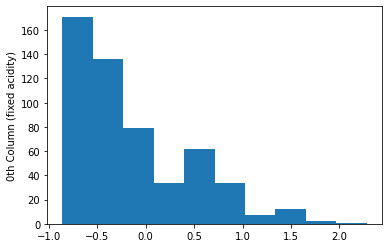

In [ ]:
import matplotlib.pyplot as plt

plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

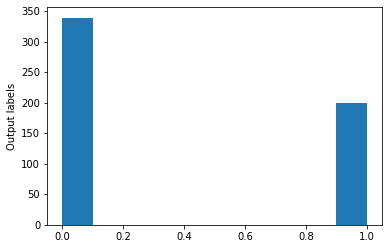

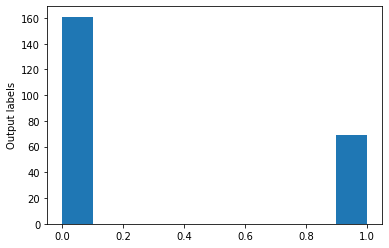

In [ ]:
plt.hist(YTRAIN)
plt.ylabel('Output labels')
plt.show()

plt.hist(YVAL)
plt.ylabel('Output labels')
plt.show()

In [ ]:
mean = XTRAIN.mean(axis=0)
XTRAIN -= mean
std = XTRAIN.std(axis=0)
XTRAIN /= std

XVAL -= mean
XVAL /= std

In [ ]:
print(mean)
print(std)

[-0.16047086 -0.25931668 -0.25797611 -0.19514285 -0.17399233 -0.25743607
 -0.03292201 -0.25637602]
[0.61620809 0.03030974 0.05497382 0.15611428 0.03396123 0.11431019
 1.02072772 0.11536921]


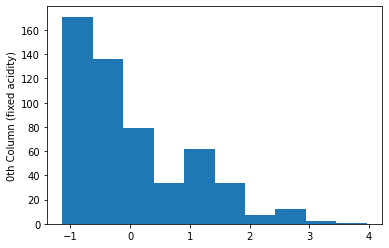

In [ ]:
plt.hist(XTRAIN[:, 0])
plt.ylabel('0th Column (fixed acidity)')
plt.show()

# **Dense layer implemented as a Layer subclass**

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
class SimpleDense(keras.layers.Layer):

  def __init__(self, units, activation=None): 
    super().__init__()
    self.units = units
    self.activation = activation

    def build(self, input_shape):
      input_dim = input_shape[-1]
      self.W = self.add_weight(shape=(input_dim, self.units),
                         initializer="random_normal")
      self.b = self.add_weight(shape=(self.units,),
                         initializer="zeros")
      
    def call(self, inputs):
      y = tf.matmul(inputs, self.W) + self.b 
      if self.activation is not None:
        y = self.activation(y) 
      return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

In [ ]:
input_tensor = tf.ones(shape=(2, 784))

In [ ]:
output_tensor = my_dense(input_tensor)

In [ ]:
print(output_tensor.shape)

(2, 784)


In [ ]:
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import models

In [ ]:
layer = layers.Dense(4, input_dim = len(XTRAIN[0, :]), activation="relu")

# **Creating NN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
#Subclass layer
model.add(layer)
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_18 (Dense)            (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


# **Compile the Model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Train Model**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'my_best_model.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [ ]:
history = model.fit(XTRAIN, YTRAIN, validation_data=(XVAL, YVAL), epochs=256, batch_size=10, callbacks = [callback_a, callback_b])

Epoch 1/256
31/54 [================>.............] - ETA: 0s - loss: 0.8777 - accuracy: 0.6387 
Epoch 00001: val_loss improved from inf to 22.96519, saving model to my_best_model.hdf5
54/54 [==============================] - 1s 6ms/step - loss: 0.8442 - accuracy: 0.6301 - val_loss: 22.9652 - val_accuracy: 0.7000
Epoch 2/256
32/54 [================>.............] - ETA: 0s - loss: 0.7416 - accuracy: 0.6375
Epoch 00002: val_loss improved from 22.96519 to 16.08362, saving model to my_best_model.hdf5
54/54 [==============================] - 0s 4ms/step - loss: 0.7410 - accuracy: 0.6208 - val_loss: 16.0836 - val_accuracy: 0.7000
Epoch 3/256
26/54 [=============>................] - ETA: 0s - loss: 0.6760 - accuracy: 0.6115
Epoch 00003: val_loss improved from 16.08362 to 11.34127, saving model to my_best_model.hdf5
54/54 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.6059 - val_loss: 11.3413 - val_accuracy: 0.7000
Epoch 4/256
30/54 [===============>..............]

# **Learning Curves**

In [ ]:
print(history.params)


{'verbose': 1, 'epochs': 256, 'steps': 54}


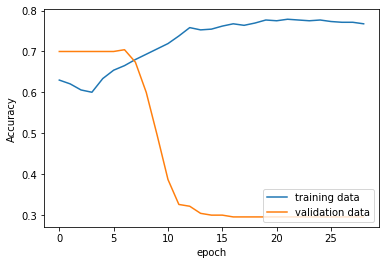

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()


In [ ]:
model.load_weights('my_best_model.hdf5')

# **Evaluation**

In [ ]:
scores = model.evaluate(XTRAIN, YTRAIN)
print(model.metrics_names)
print(scores)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.5413 - accuracy: 0.7045
['loss', 'accuracy']
[0.5413309335708618, 0.7044609785079956]

accuracy: 70.45%


In [ ]:
scores = model.evaluate(XVAL, YVAL)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 3ms/step - loss: 2.1036 - accuracy: 0.6000

accuracy: 60.00%


# **Predictions**

In [ ]:
print(XVAL[0:5])
print(YVAL[0:5])

[[ 9.00000000e+00  1.56000000e+02  8.60000000e+01 -2.31127150e-15
   2.12490834e-14  2.48000000e+01  2.30000000e-01  5.30000000e+01]
 [ 8.00000000e+00  1.07000000e+02  8.00000000e+01 -2.31127150e-15
   2.12490834e-14  2.46000000e+01  8.56000000e-01  3.40000000e+01]
 [ 6.00000000e+00  1.17000000e+02  9.60000000e+01 -2.31127150e-15
   2.12490834e-14  2.87000000e+01  1.57000000e-01  3.00000000e+01]
 [-4.50425366e-17  1.38000000e+02  6.00000000e+01  3.50000000e+01
   1.67000000e+02  3.46000000e+01  5.34000000e-01  2.10000000e+01]
 [ 1.00000000e+00  1.67000000e+02  7.40000000e+01  1.70000000e+01
   1.44000000e+02  2.34000000e+01  4.47000000e-01  3.30000000e+01]]
[1. 0. 0. 1. 1.]


In [ ]:
prediction = model.predict(XVAL)

In [ ]:
print(prediction[0:10].round())


[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]]


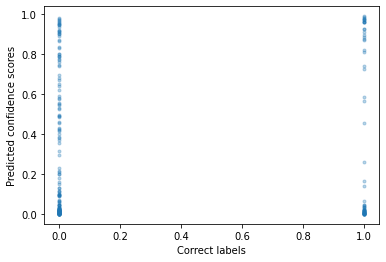

In [ ]:
plt.plot(YVAL, prediction, '.', alpha = 0.3)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(YVAL, prediction.round())
precision = precision_score(YVAL, prediction.round())
recall = recall_score(YVAL, prediction.round())
f1score = f1_score(YVAL, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))


Accuracy: 60.00%
Precision: 33.80%
Recall: 34.78%
F1-score: 0.34
